In [30]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# Importing dataset
df = pd.read_csv('Indian_Startup_Data.csv')

In [32]:
import pandas as pd

# Assuming you have read your dataset into a DataFrame named 'df'
# Replace 'Count' with the actual column name containing the count
new_df = df.loc[df.index.repeat(df['Count'])]

# Reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

# new_df = df.drop(columns=['S No.'])

# Print the new DataFrame
new_df


,S No.,Year,State,Industry,Count
0,1,2023,Andaman and Nicobar Islands,Automotive,1
1,2,2023,Andaman and Nicobar Islands,Construction,2
2,2,2023,Andaman and Nicobar Islands,Construction,2
3,3,2023,Andhra Pradesh,Advertising,1
4,4,2023,Andhra Pradesh,Aeronautics Aerospace & Defence,1
...,...,...,...,...,...
91744,6682,2016,West Bengal,NOT SPECIFIED,8
91745,6682,2016,West Bengal,NOT SPECIFIED,8
91746,6682,2016,West Bengal,NOT SPECIFIED,8
91747,6682,2016,West Bengal,NOT SPECIFIED,8


In [33]:
new_df = new_df.drop(columns=['S No.'])
new_df


,Year,State,Industry,Count
0,2023,Andaman and Nicobar Islands,Automotive,1
1,2023,Andaman and Nicobar Islands,Construction,2
2,2023,Andaman and Nicobar Islands,Construction,2
3,2023,Andhra Pradesh,Advertising,1
4,2023,Andhra Pradesh,Aeronautics Aerospace & Defence,1
...,...,...,...,...
91744,2016,West Bengal,NOT SPECIFIED,8
91745,2016,West Bengal,NOT SPECIFIED,8
91746,2016,West Bengal,NOT SPECIFIED,8
91747,2016,West Bengal,NOT SPECIFIED,8


In [34]:
df.head(15)

,S No.,Year,State,Industry,Count
0,1,2023,Andaman and Nicobar Islands,Automotive,1
1,2,2023,Andaman and Nicobar Islands,Construction,2
2,3,2023,Andhra Pradesh,Advertising,1
3,4,2023,Andhra Pradesh,Aeronautics Aerospace & Defence,1
4,5,2023,Andhra Pradesh,Agriculture,2
5,6,2023,Andhra Pradesh,Construction,5
6,7,2023,Andhra Pradesh,Education,5
7,8,2023,Andhra Pradesh,Enterprise Software,1
8,9,2023,Andhra Pradesh,Finance Technology,1
9,10,2023,Andhra Pradesh,Food & Beverages,2


In [35]:
mask = (new_df['Year'] >= 2018) & (new_df['Year'] <= 2023)

In [36]:
df = new_df[mask]

In [37]:
df

,Year,State,Industry,Count
0,2023,Andaman and Nicobar Islands,Automotive,1
1,2023,Andaman and Nicobar Islands,Construction,2
2,2023,Andaman and Nicobar Islands,Construction,2
3,2023,Andhra Pradesh,Advertising,1
4,2023,Andhra Pradesh,Aeronautics Aerospace & Defence,1
...,...,...,...,...
85804,2018,West Bengal,Travel & Tourism,8
85805,2018,West Bengal,Travel & Tourism,8
85806,2018,West Bengal,Travel & Tourism,8
85807,2018,West Bengal,Travel & Tourism,8


In [38]:
# Checking for Null values
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

Year        0.0 %
State       0.0 %
Industry    0.0 %
Count       0.0 %
dtype: object

In [39]:
# Assuming 'category_column' is the name of the column by which you want to categorize the dataset

# Get unique values in the 'category_column'
unique_categories = df['State'].unique()

# Create a dictionary to store subsets of the data based on unique values
category_dict = {}

# Iterate through unique categories and create subsets
for category in unique_categories:
    category_dict[category] = df[df['State'] == category]

# Now, 'category_dict' contains subsets of the data categorized by 'category_column'
# Each key in the dictionary corresponds to a unique category value, and the corresponding value is a DataFrame subset.


In [40]:

# Count the number of startups founded in each year
startup_counts = df['Year'].value_counts().sort_index()

# 'startup_counts' is now a Series that contains the count of startups for each year
print(startup_counts)

2018     8949
2019    11719
2020    14810
2021    20306
2022    26363
2023     3662
Name: Year, dtype: int64


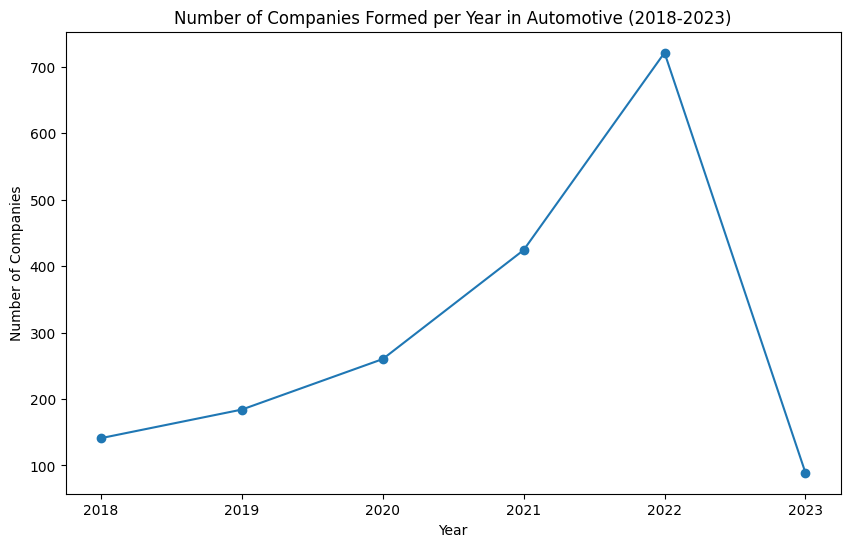

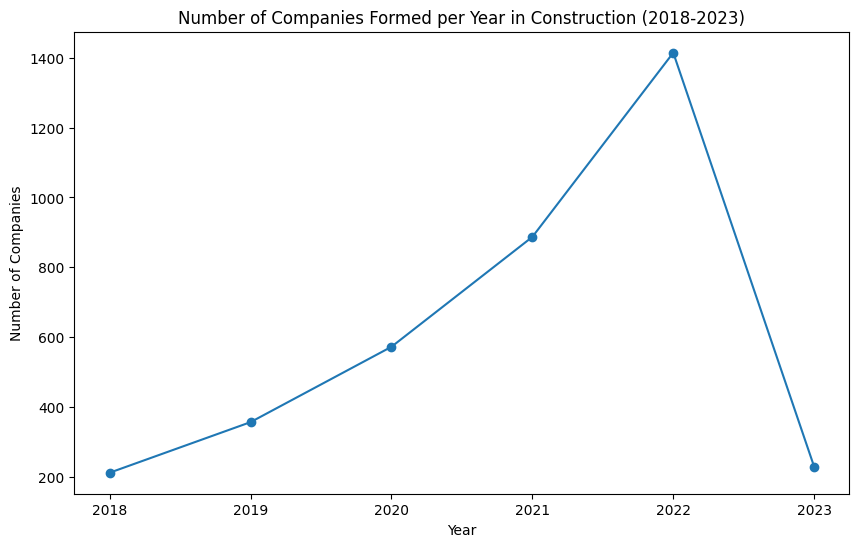

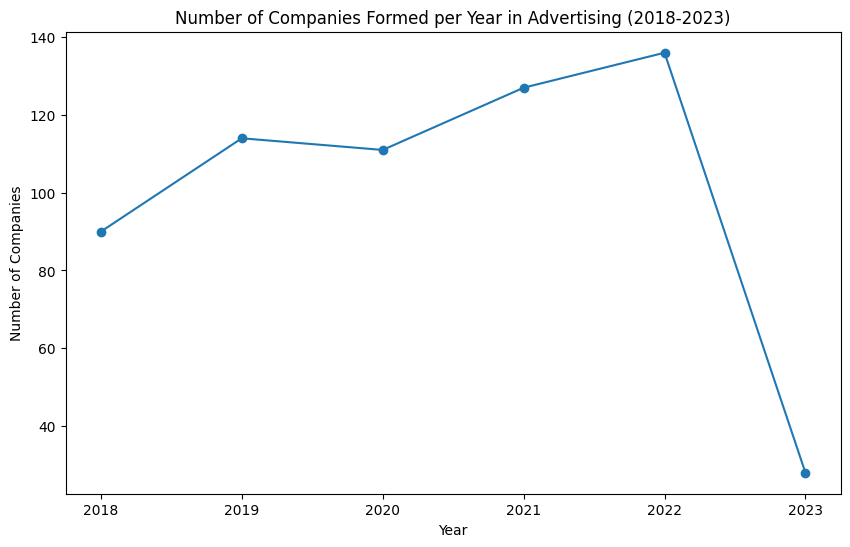

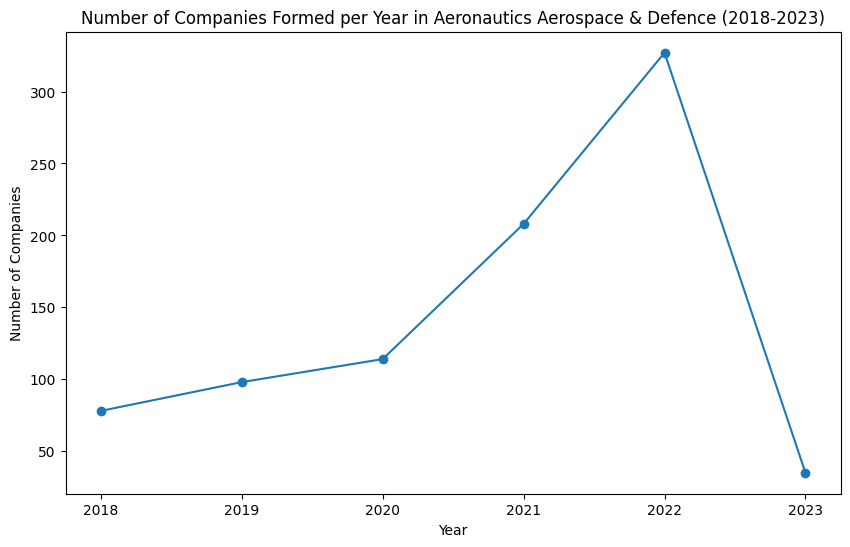

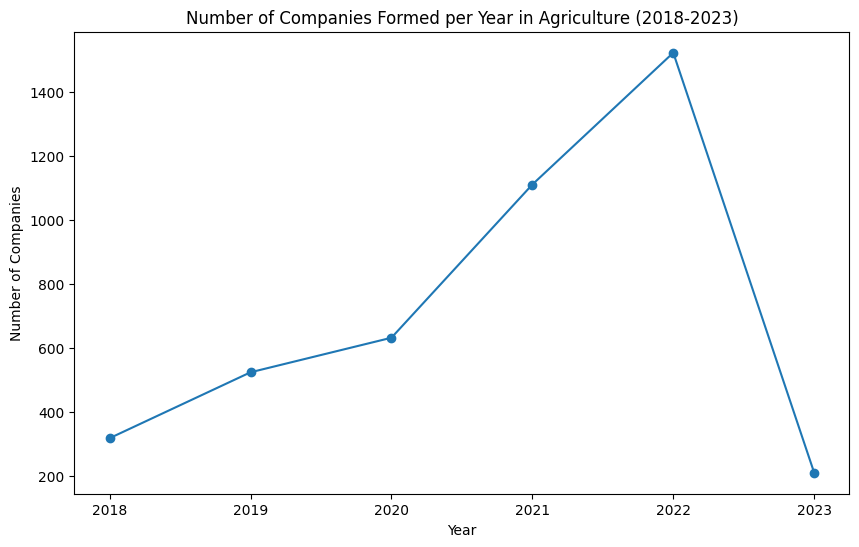

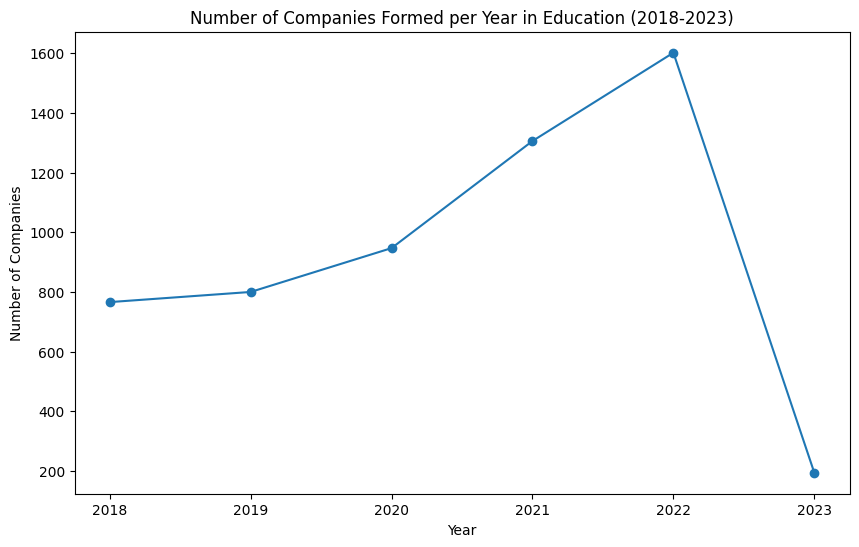

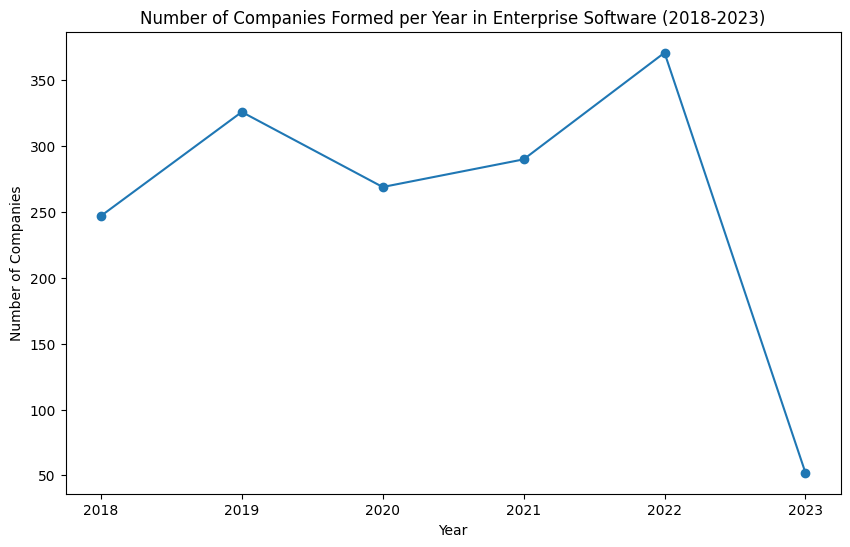

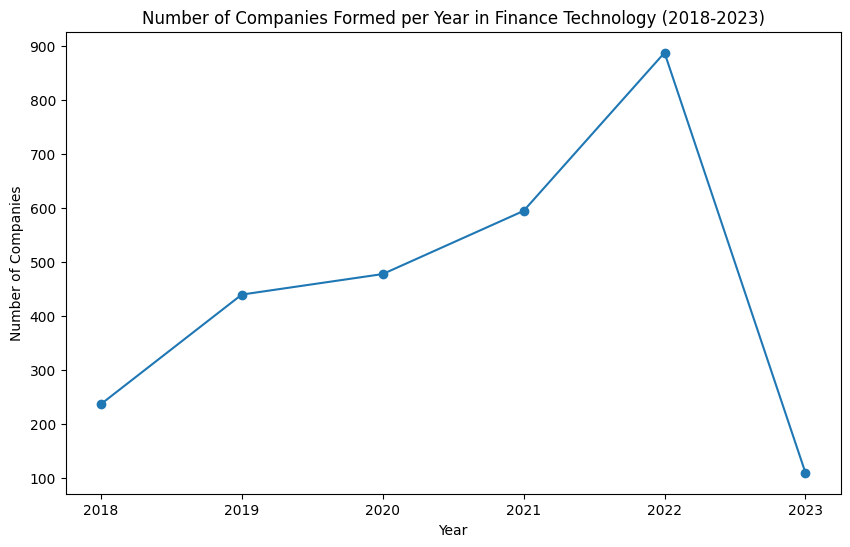

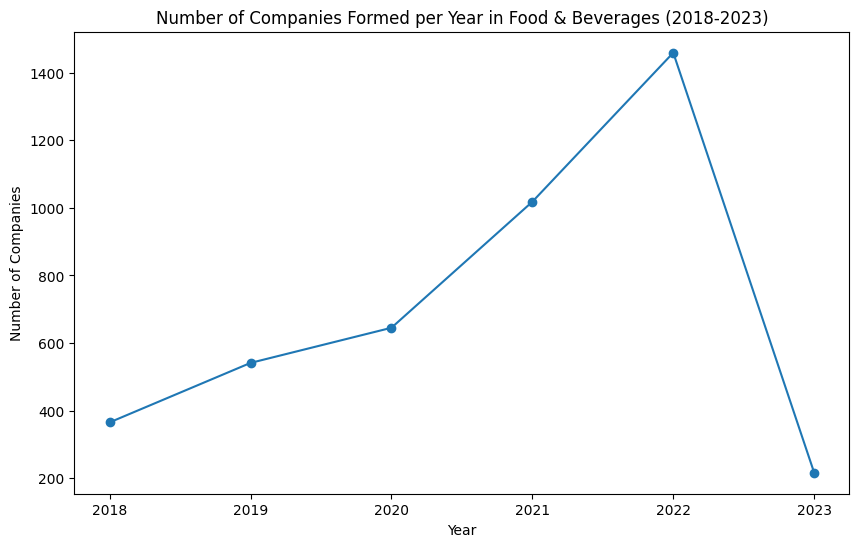

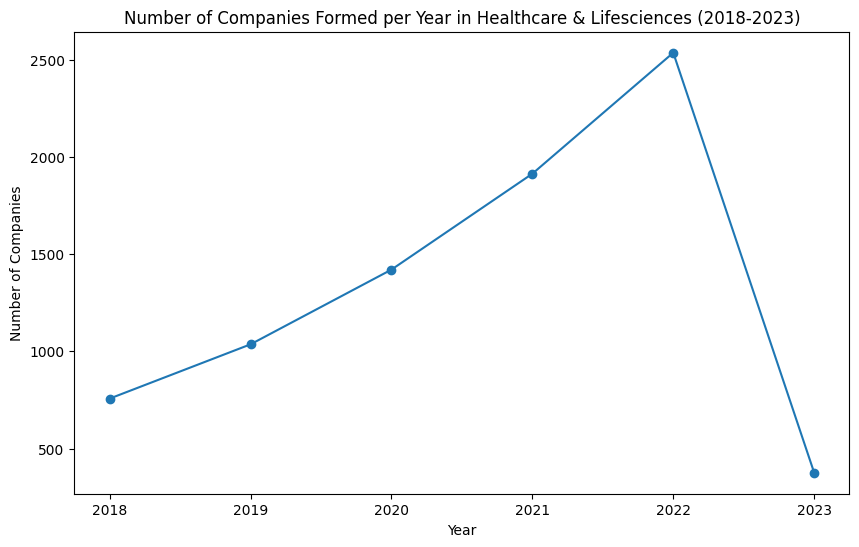

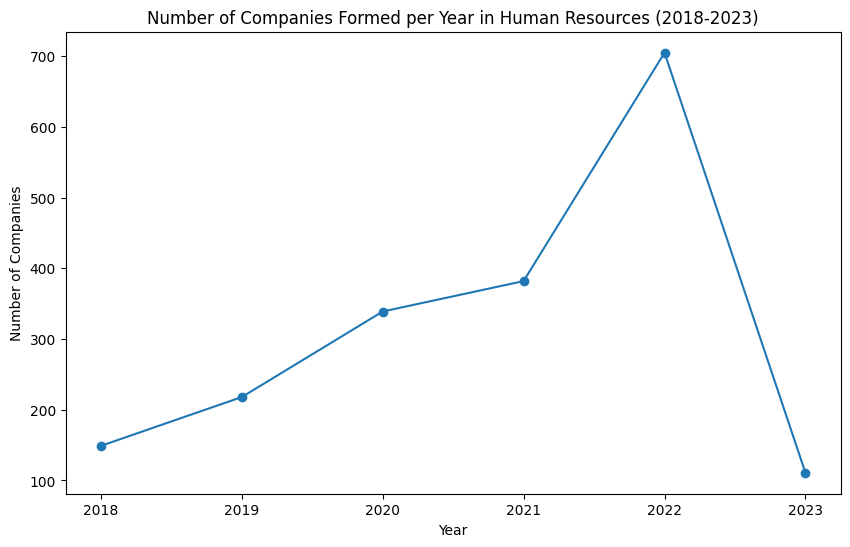

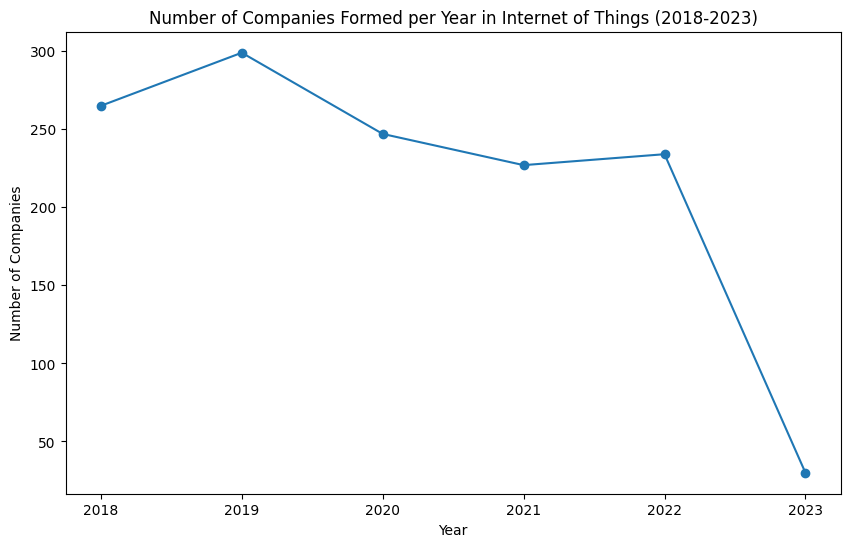

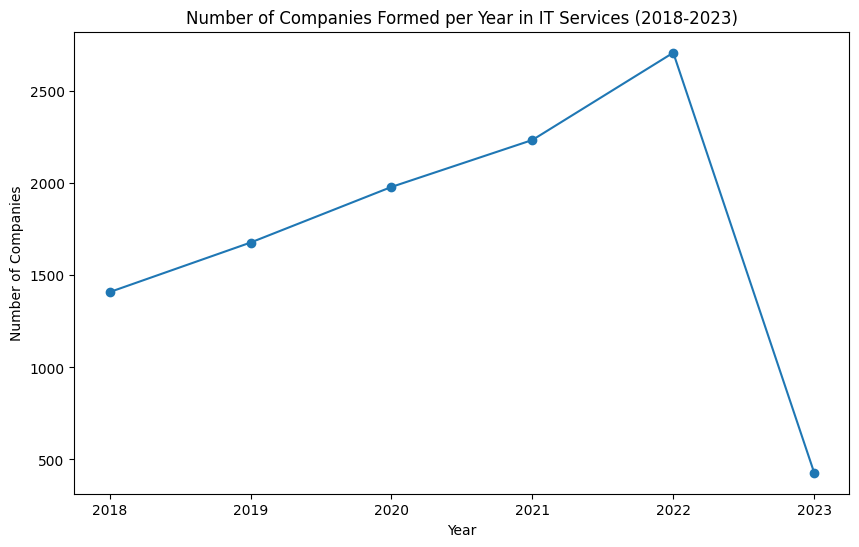

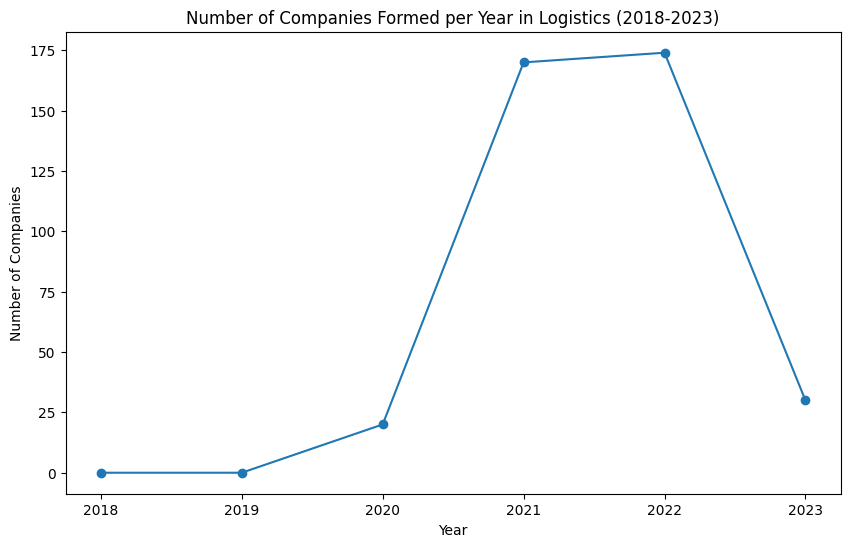

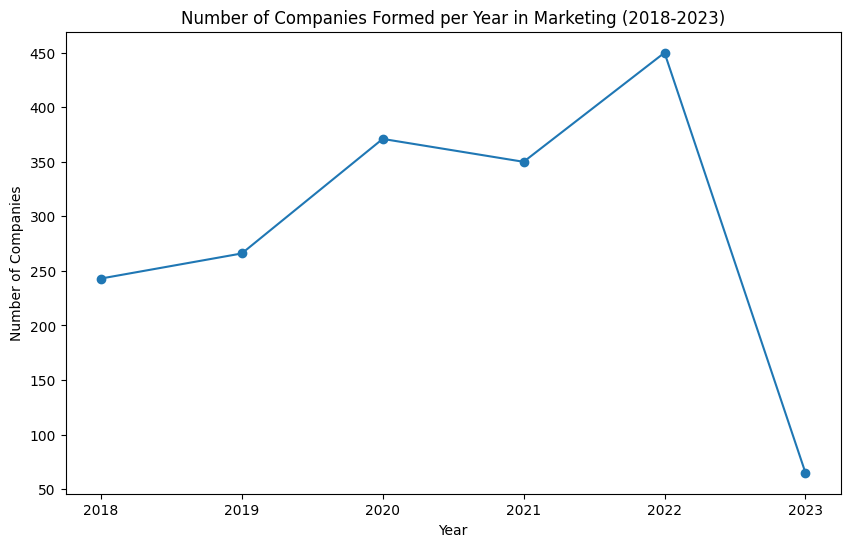

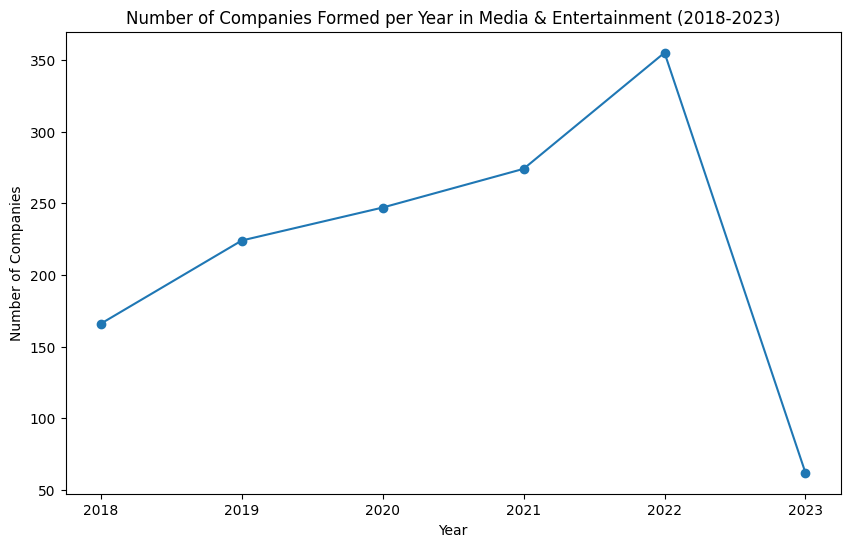

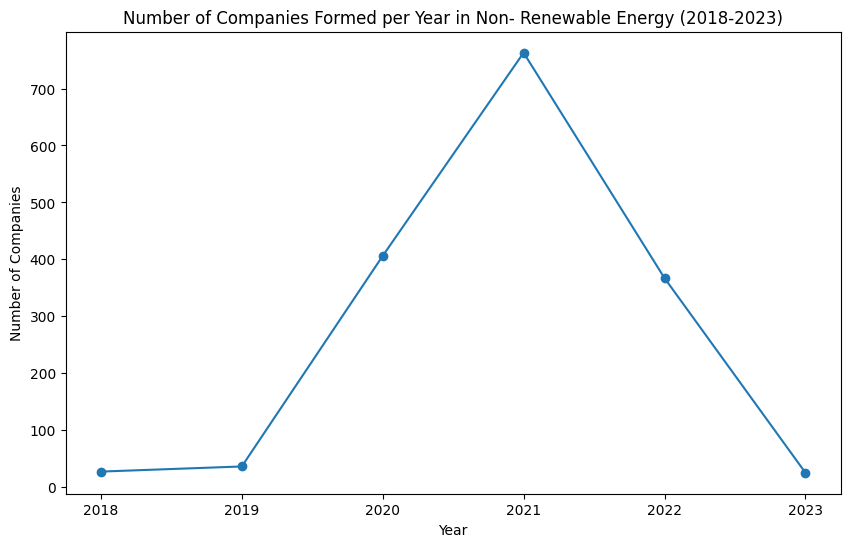

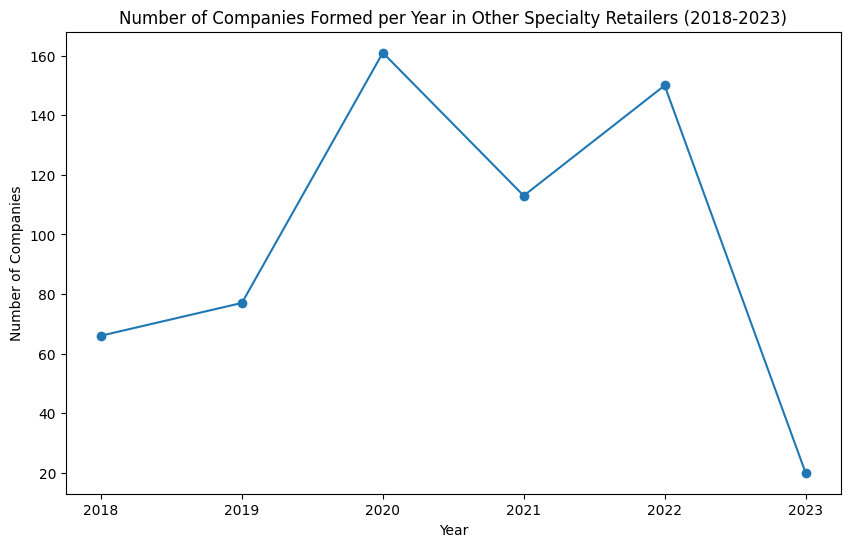

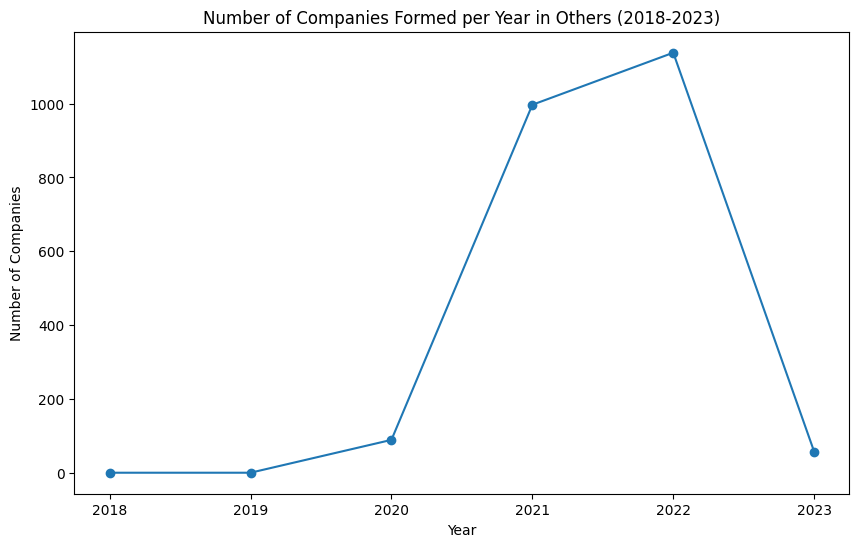

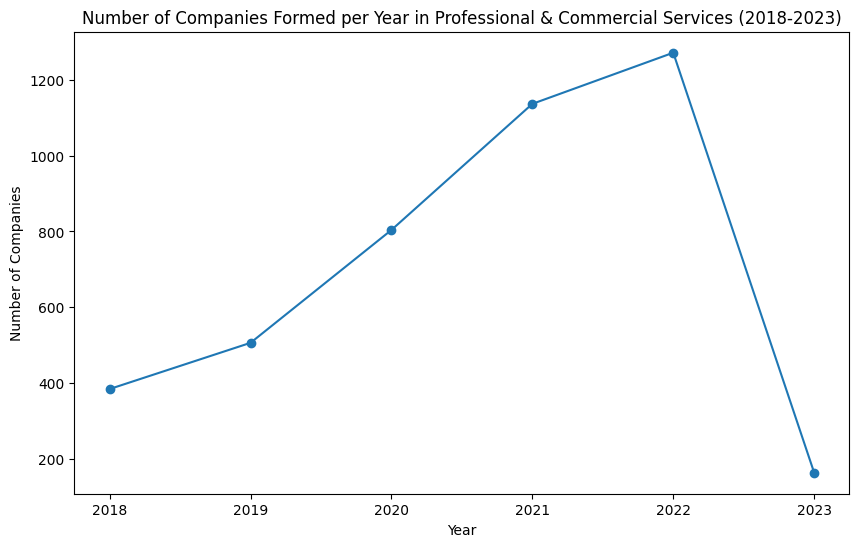

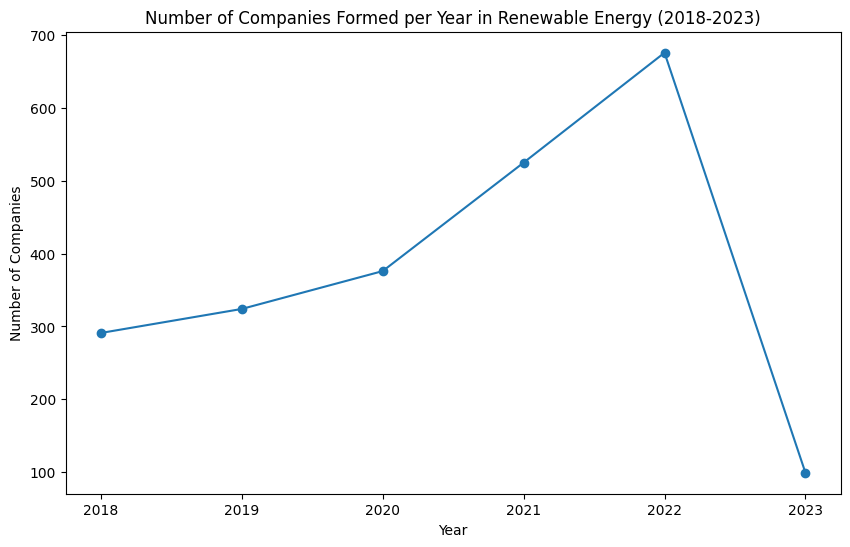

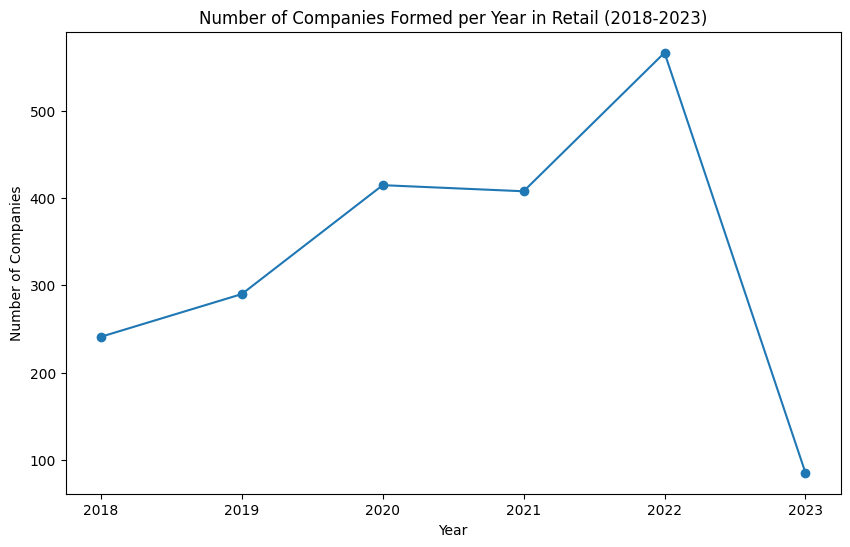

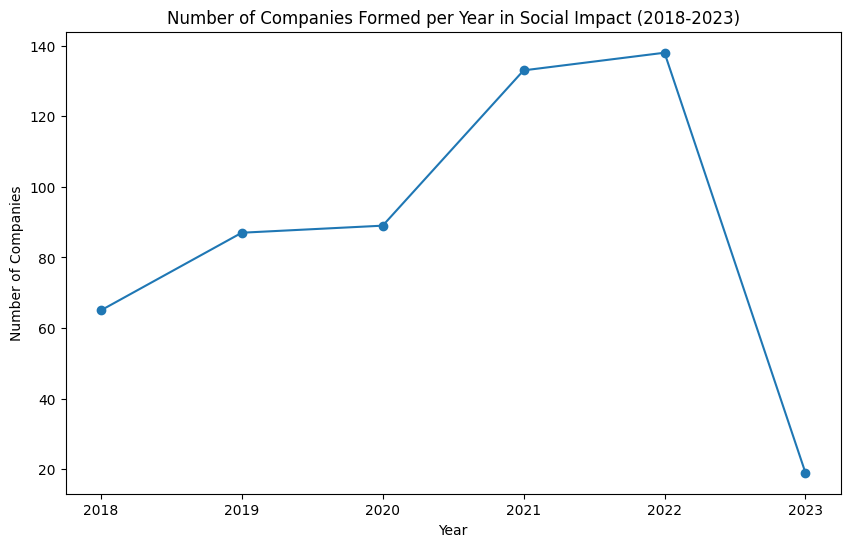

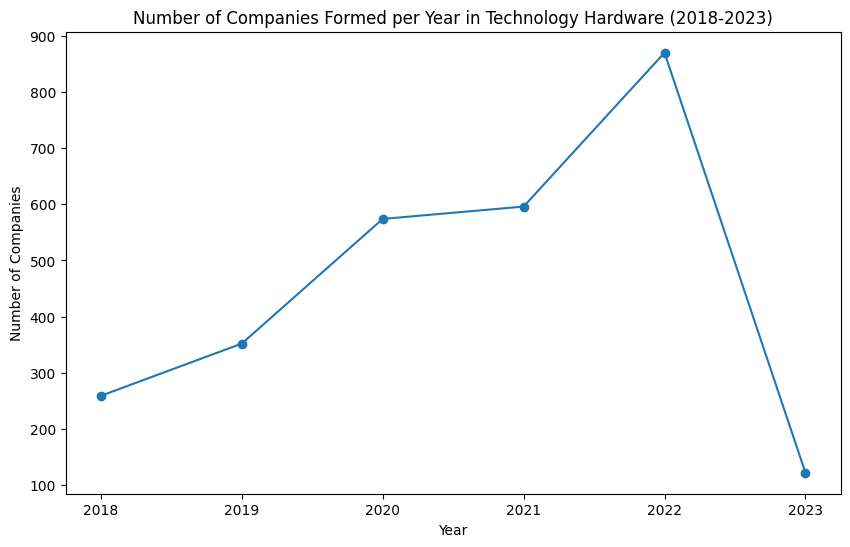

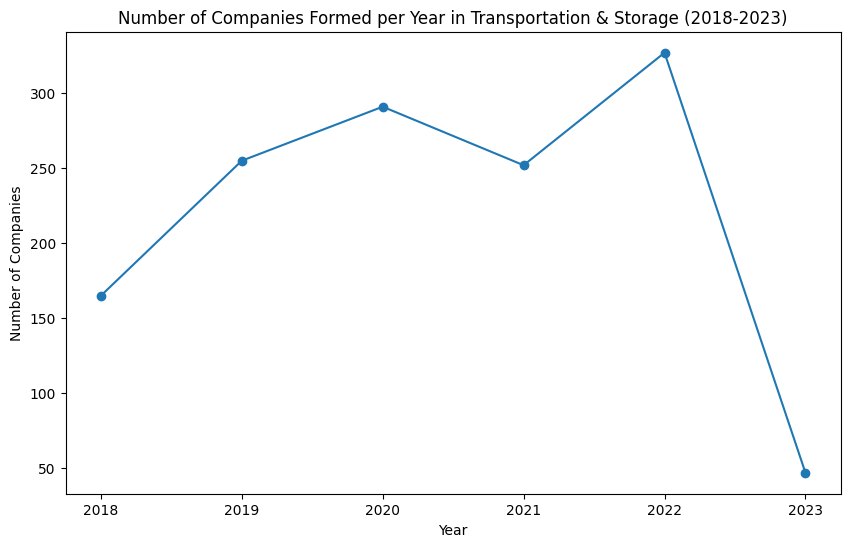

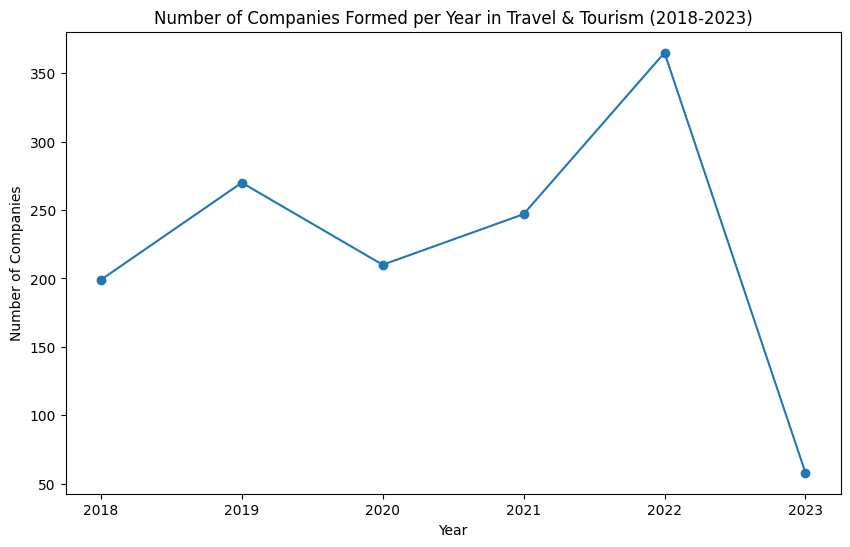

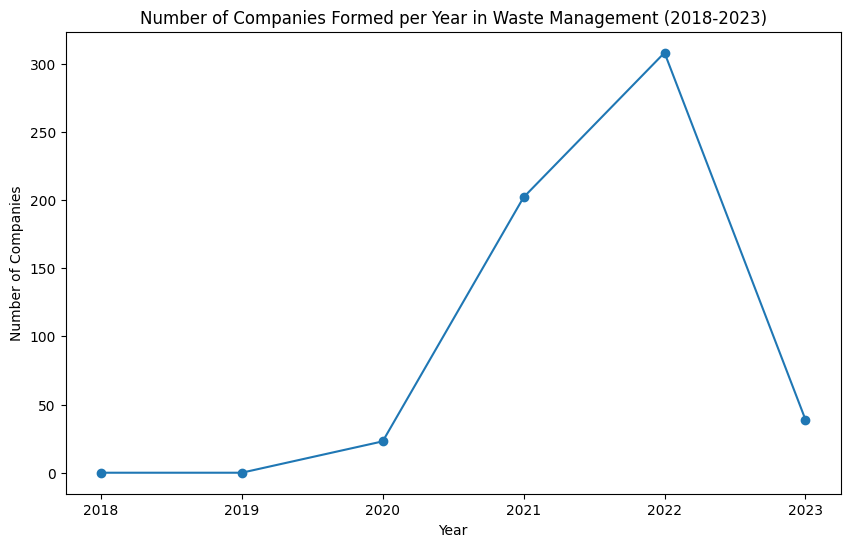

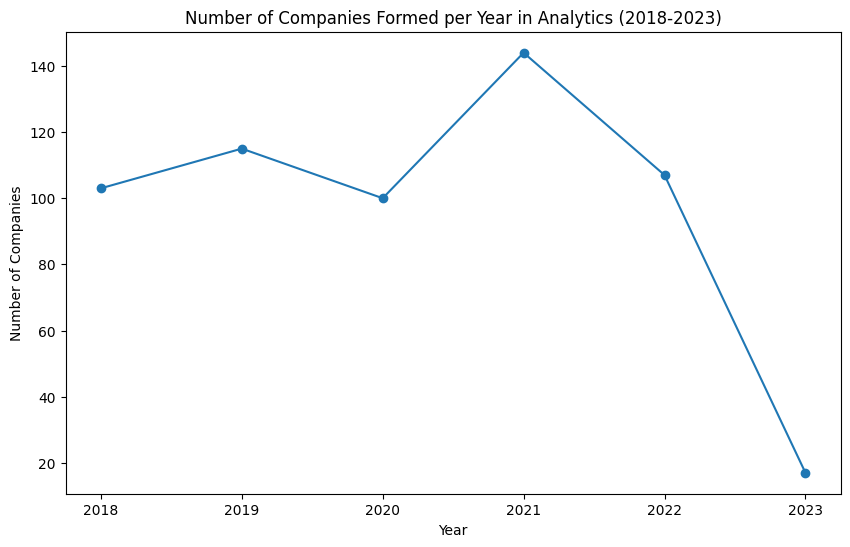

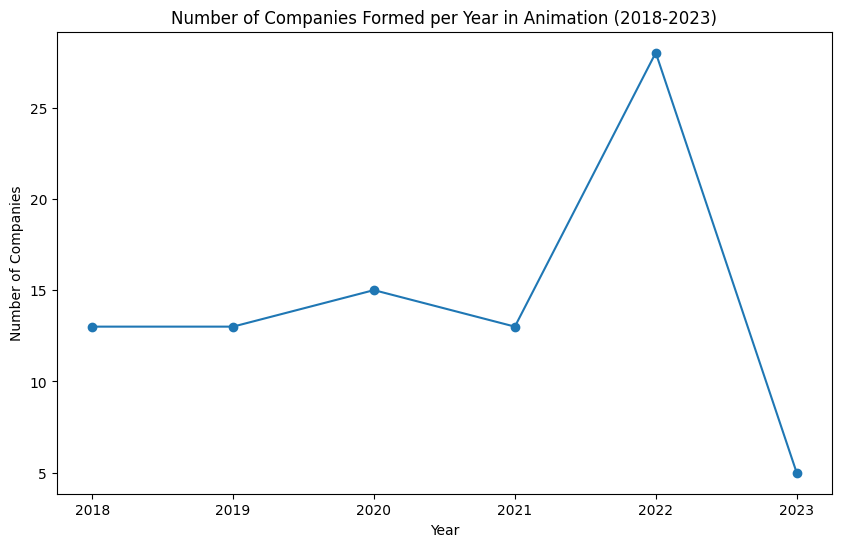

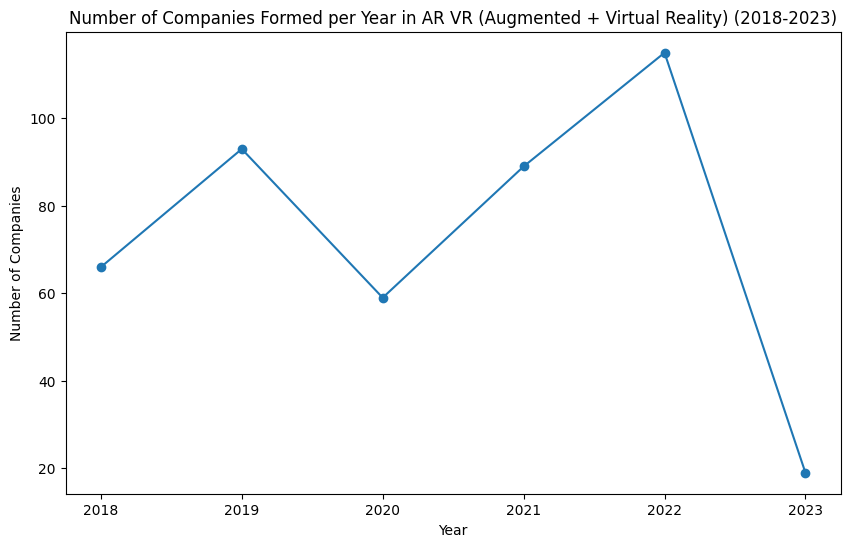

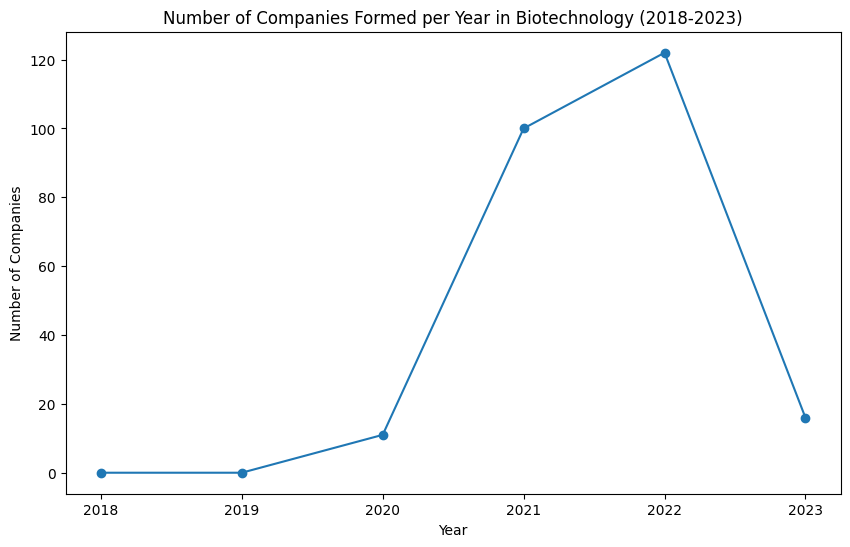

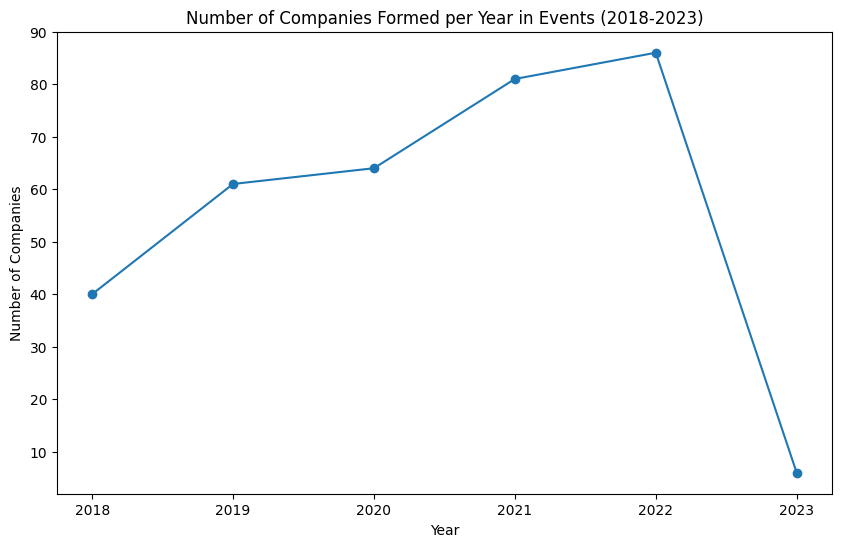

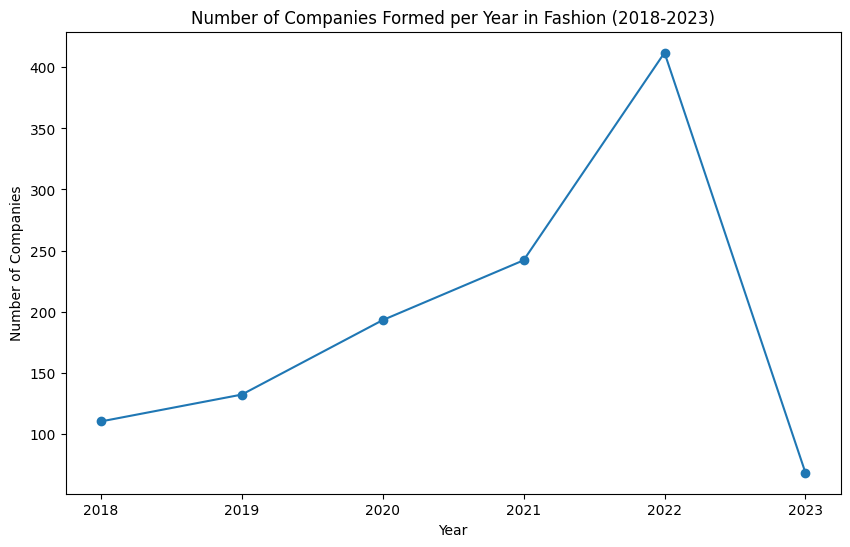

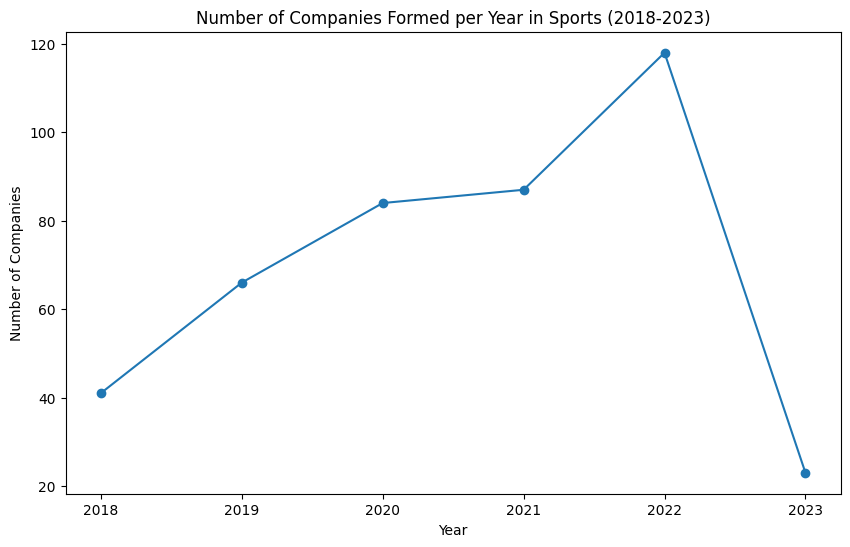

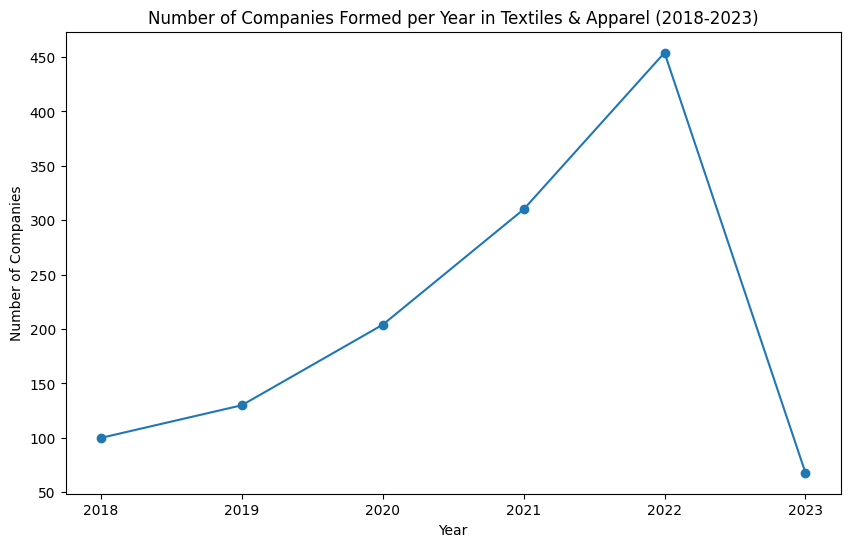

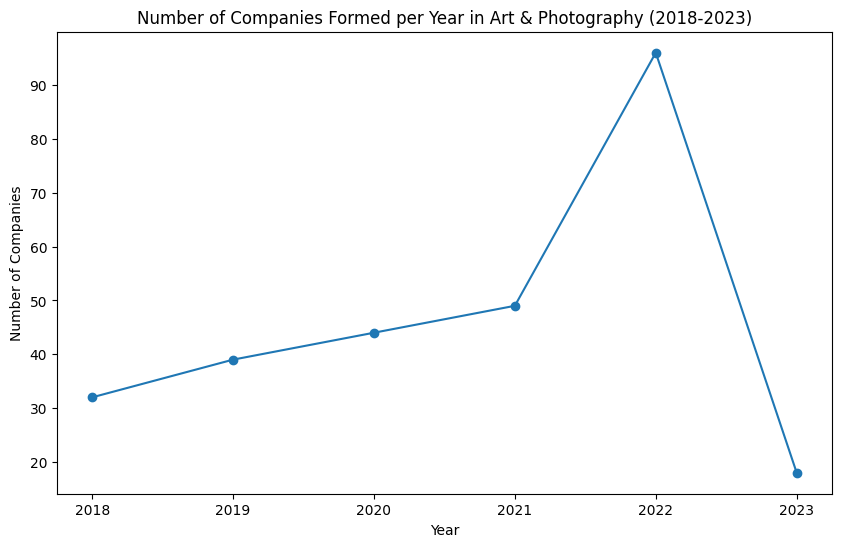

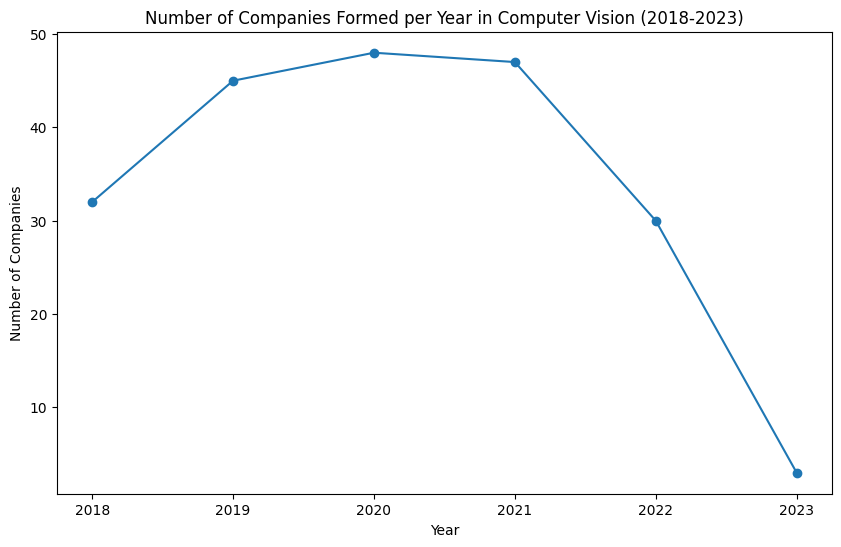

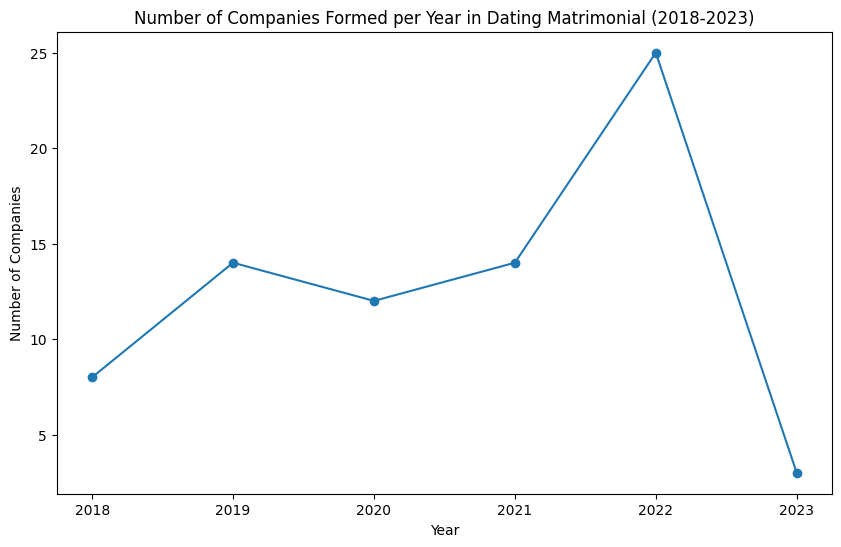

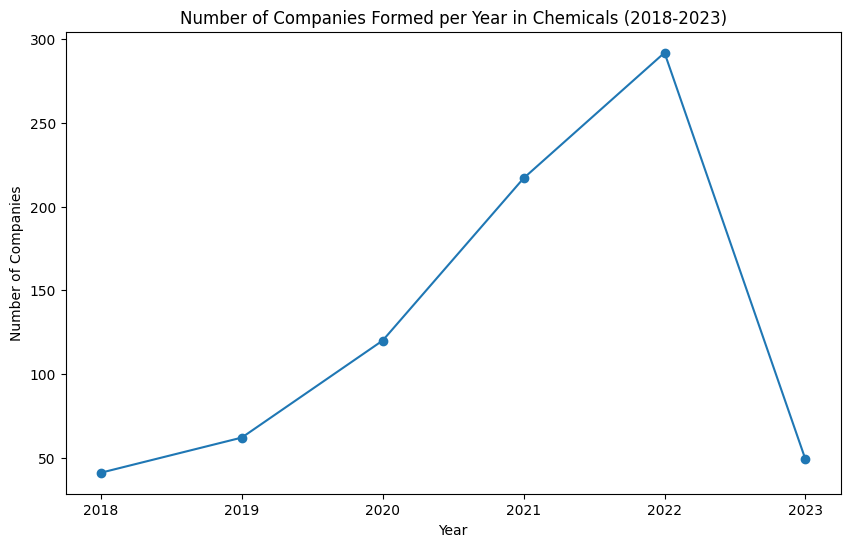

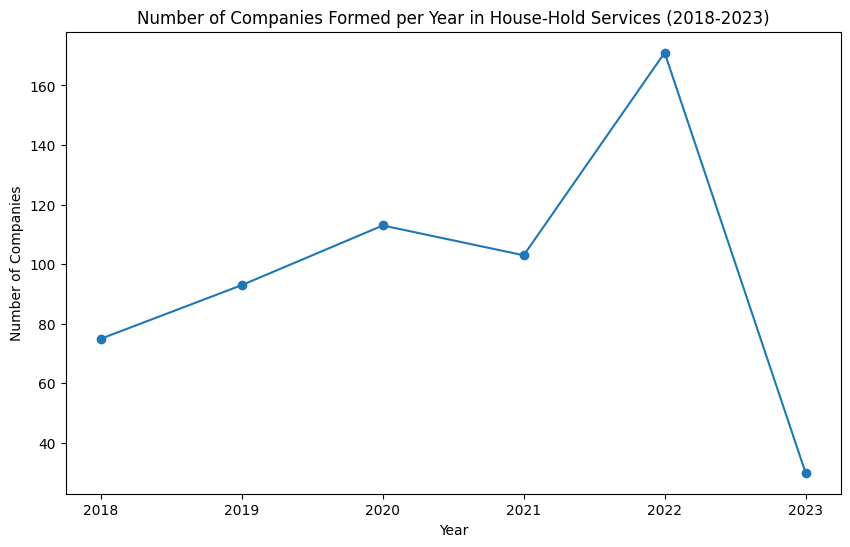

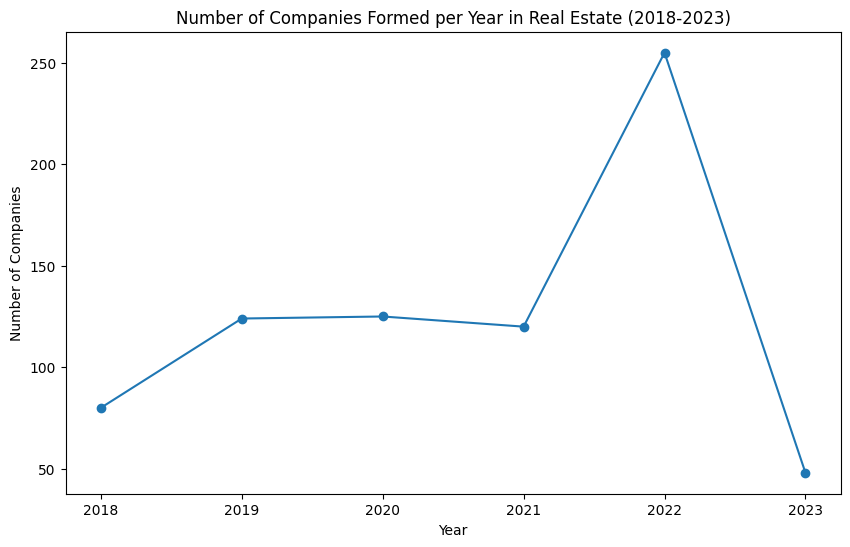

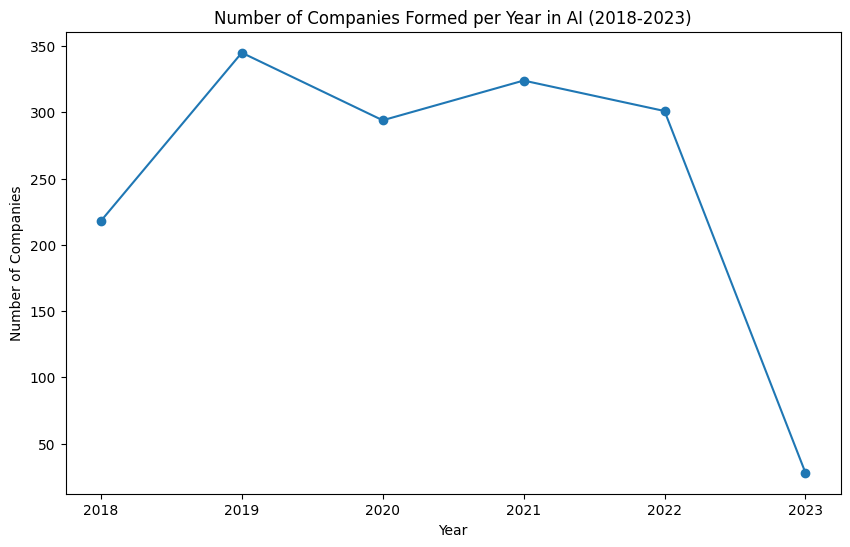

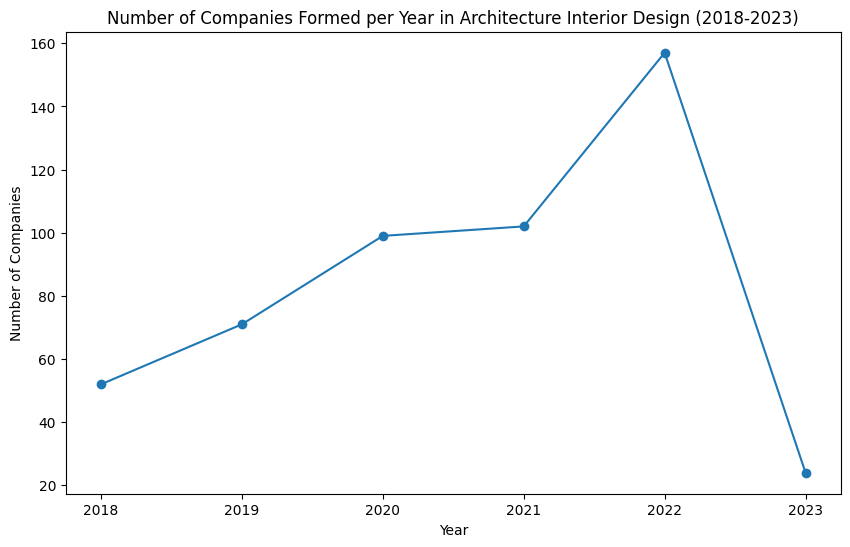

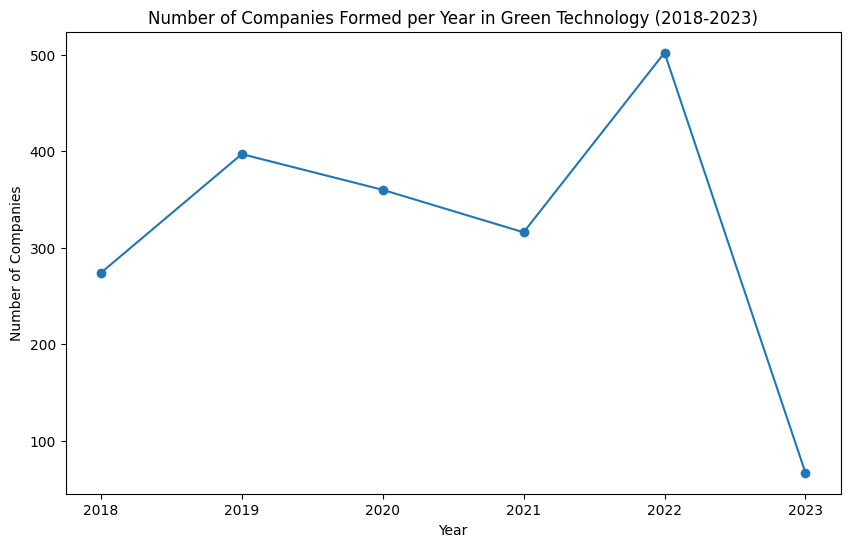

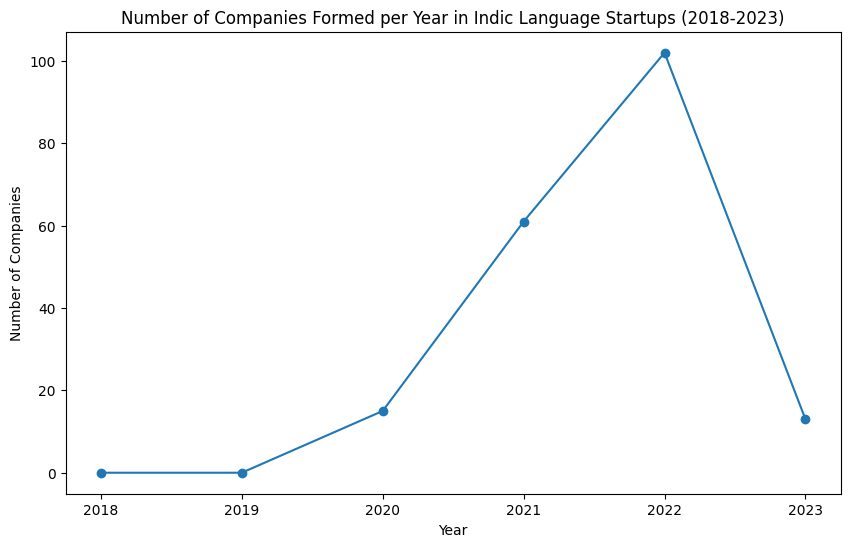

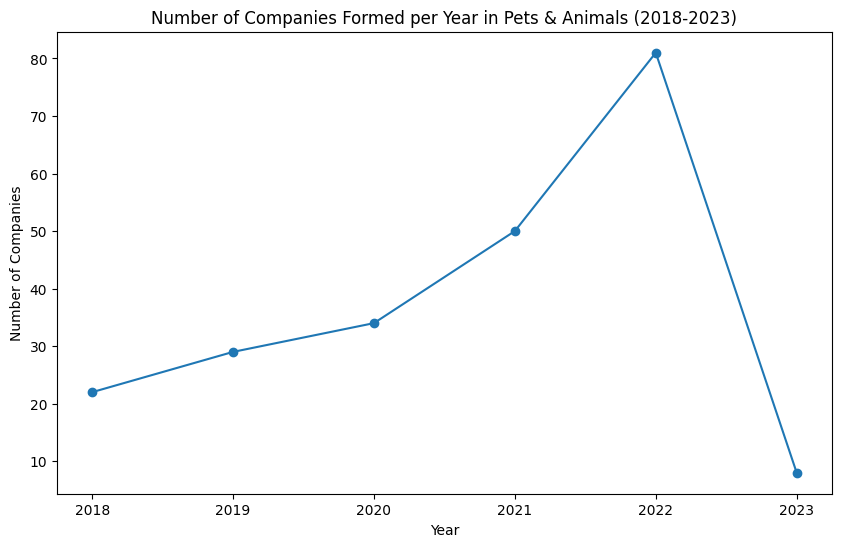

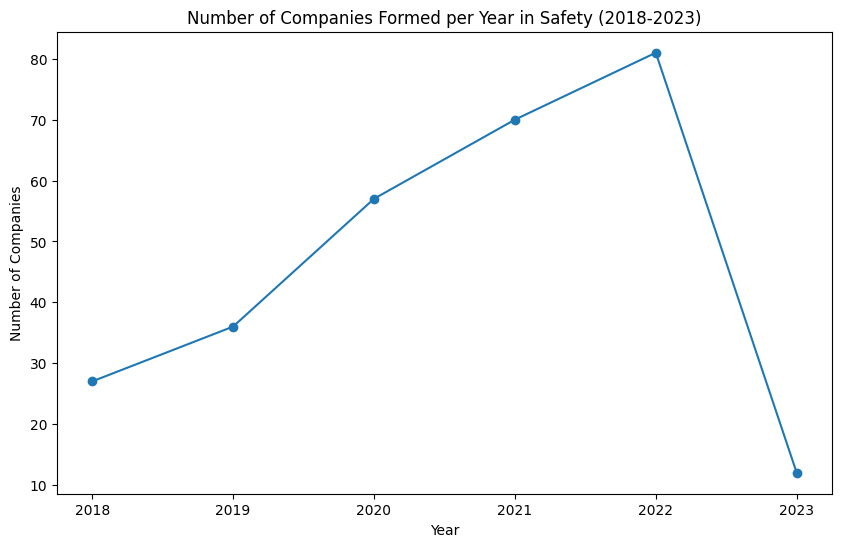

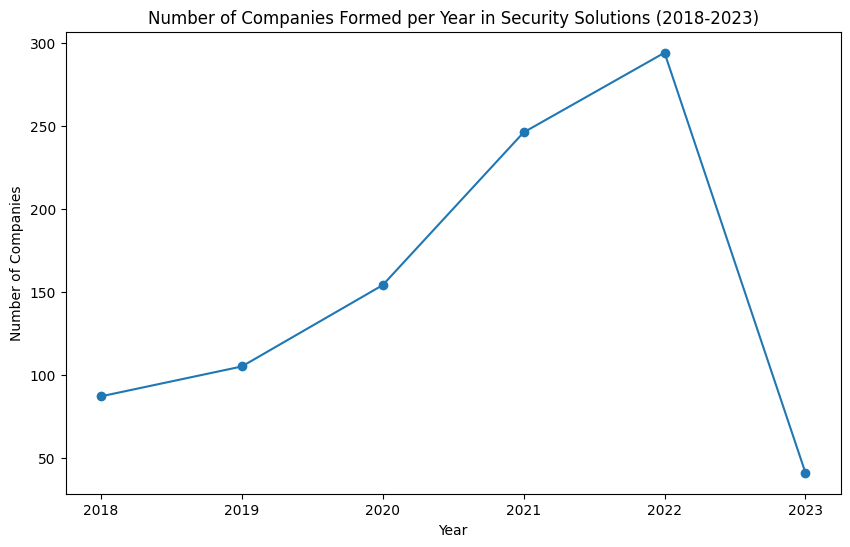

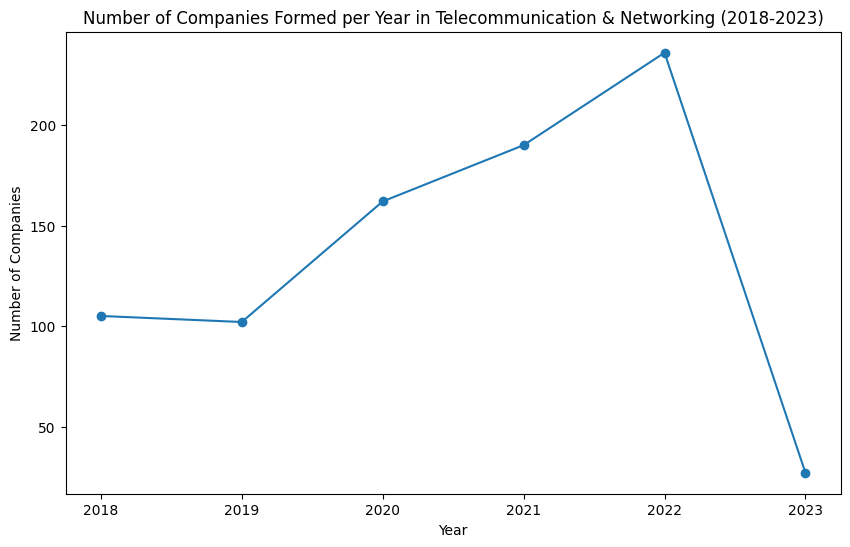

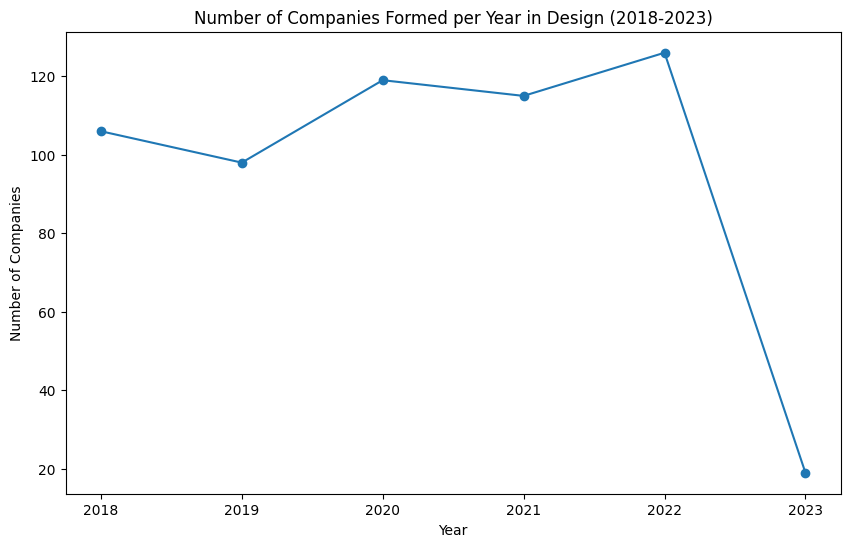

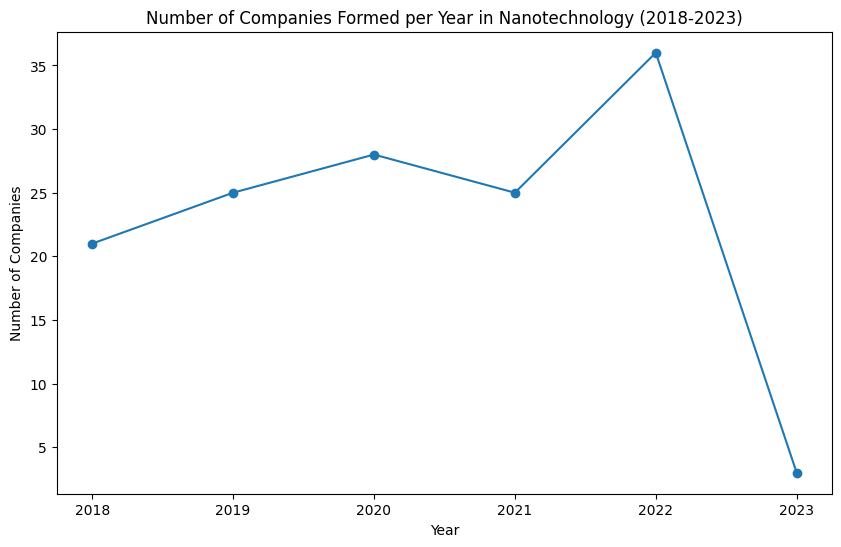

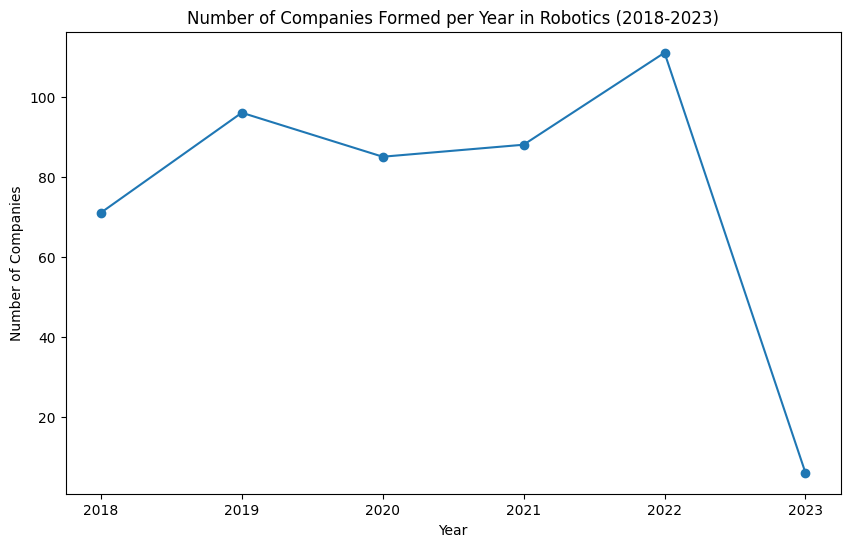

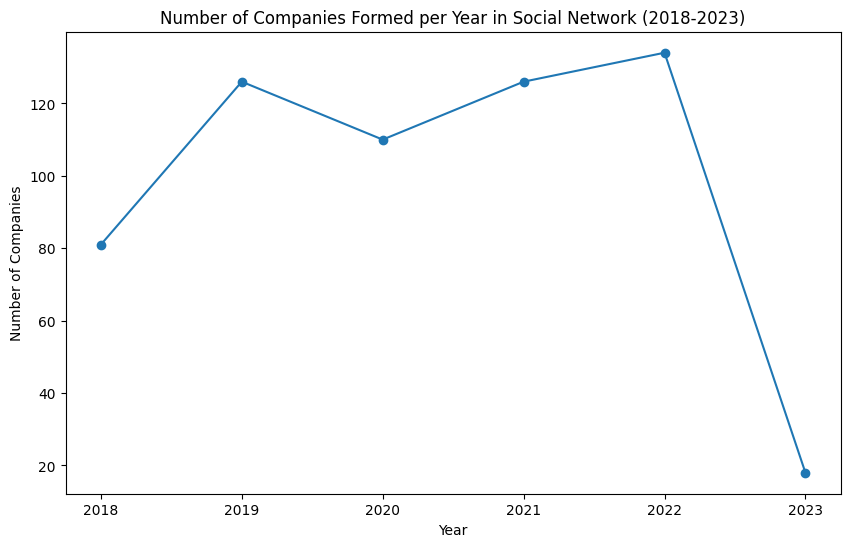

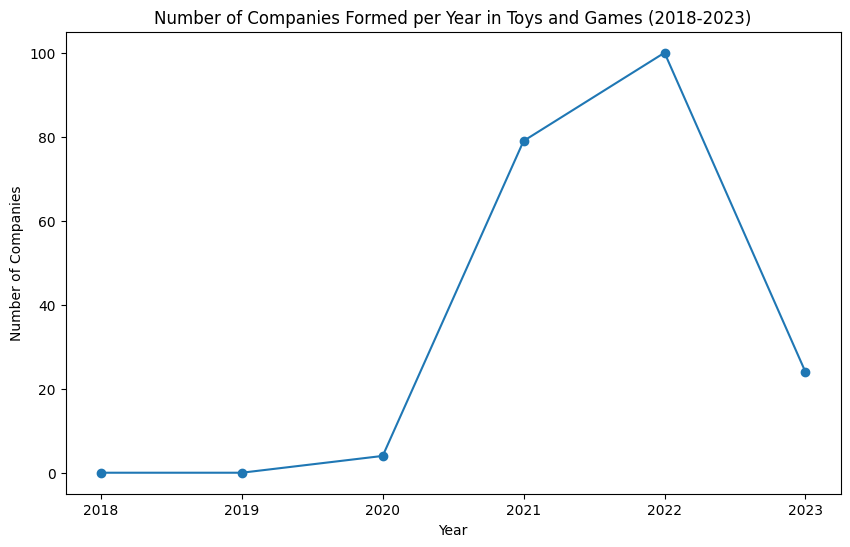

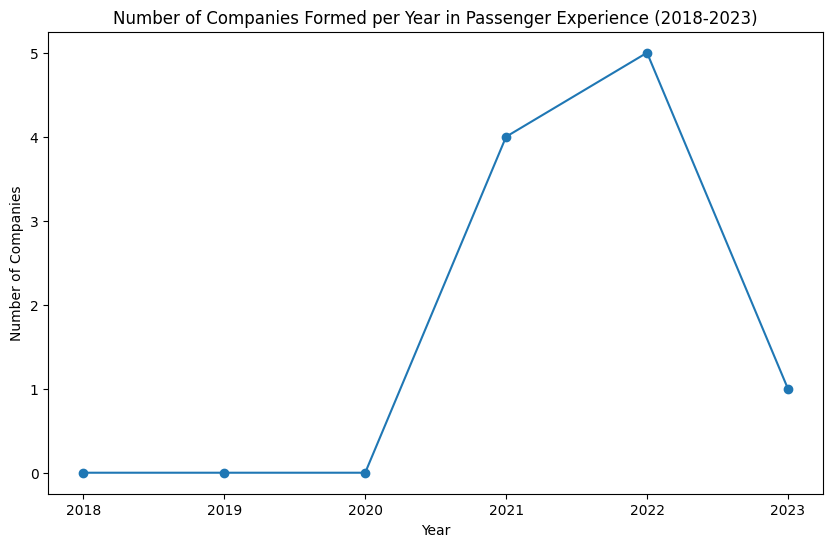

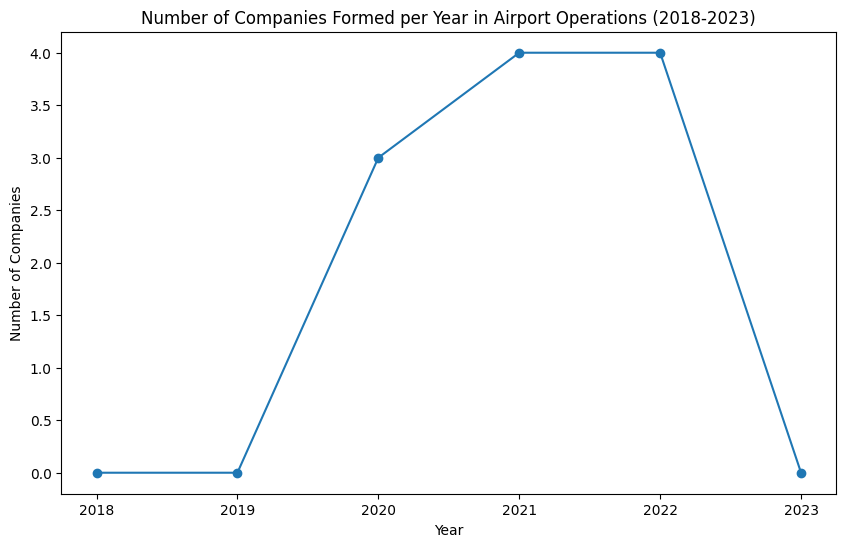

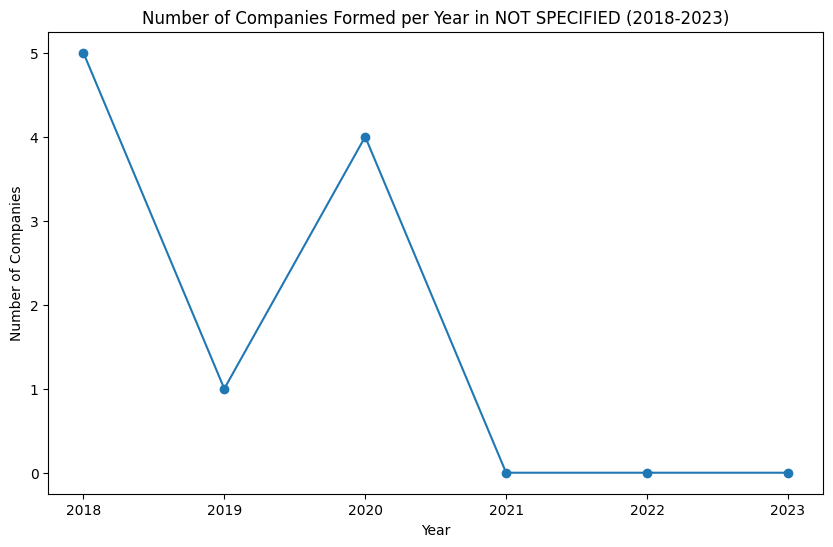

In [41]:
unique_industries = df['Industry'].unique()

# Create a separate line graph for each unique industry
for industry in unique_industries:
    industry_data = df[df['Industry'] == industry]
    industry_counts = industry_data['Year'].value_counts().sort_index()
    
    # Set up the figure and axes for each plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the line plot with whole number years on the x-axis
    x = range(2018, 2024)
    y = [industry_counts.get(year, 0) for year in x]
    ax.plot(x, y, marker='o', linestyle='-')
    
    # Customize the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Companies')
    ax.set_title(f'Number of Companies Formed per Year in {industry} (2018-2023)')
    
    # Show each plot
    plt.show()

+++++++
covid question
+++++++

In [42]:
# Group the data by industry and year, and count the number of companies
grouped = df.groupby(['Industry', 'Year']).size().unstack(fill_value=0)

# Calculate the decrease in percentage from 2019 to 2020 for industries with non-zero values in 2019
grouped['Decrease_Percentage'] = ((grouped[2019] - grouped[2020]) / grouped[2019]) * 100

# Filter for companies with a decrease in percentage and non-zero value in 2019
decreased_companies = -1*grouped[(grouped['Decrease_Percentage'] > 0) & (grouped[2019] > 0)]

# Print or further process the 'decreased_companies' DataFrame
print(decreased_companies)




Year                                 2018  2019  2020  2021  2022  2023  \
Industry                                                                  
AI                                   -218  -345  -294  -324  -301   -28   
AR VR (Augmented + Virtual Reality)   -66   -93   -59   -89  -115   -19   
Advertising                           -90  -114  -111  -127  -136   -28   
Analytics                            -103  -115  -100  -144  -107   -17   
Dating Matrimonial                     -8   -14   -12   -14   -25    -3   
Enterprise Software                  -247  -326  -269  -290  -371   -52   
Green Technology                     -274  -397  -360  -316  -502   -67   
Internet of Things                   -265  -299  -247  -227  -234   -30   
Robotics                              -71   -96   -85   -88  -111    -6   
Social Network                        -81  -126  -110  -126  -134   -18   
Travel & Tourism                     -199  -270  -210  -247  -365   -58   

Year                    

In [51]:
# Group the data by industry and year, and count the number of companies
grouped = df.groupby(['Industry', 'Year']).size().unstack(fill_value=0)

# Calculate the decrease in percentage from 2019 to 2020 for industries with non-zero values in 2019
grouped['Decrease_Percentage'] = (((grouped[2019] - grouped[2020]) / grouped[2019]) * 100)

# Filter for companies with a decrease in percentage and non-zero value in 2019
decreased_companies = -1*grouped[(grouped['Decrease_Percentage'] > 0) & (grouped[2019] > 0)]
decreased_companies.head()

# Create a new dataframe with the industry and the corresponding decrease percentage
decreased_df = pd.DataFrame({'Industry': decreased_companies.index, 'Decrease_Percentage': decreased_companies['Decrease_Percentage']})

# Print or further process the 'decreased_df' DataFrame
print(decreased_df)





                                                                Industry  \
Industry                                                                   
AI                                                                    AI   
AR VR (Augmented + Virtual Reality)  AR VR (Augmented + Virtual Reality)   
Advertising                                                  Advertising   
Analytics                                                      Analytics   
Dating Matrimonial                                    Dating Matrimonial   
Enterprise Software                                  Enterprise Software   
Green Technology                                        Green Technology   
Internet of Things                                    Internet of Things   
Robotics                                                        Robotics   
Social Network                                            Social Network   
Travel & Tourism                                        Travel & Tourism   

           

In [52]:
decreased_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, AI to Travel & Tourism
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Industry             11 non-null     object 
 1   Decrease_Percentage  11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 264.0+ bytes


In [69]:
import random

def plot(df,x,y):
    fig, ax = plt.subplots(figsize=(10, 6))
    df_sorted = df.sort_values(y, ascending=False)
    ax.bar(df_sorted[x], df_sorted[y], color='green')
    ax.set_xticklabels(df_sorted[x], rotation=30)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{y} vs {x}')

    return fig

C:\Users\91937\AppData\Local\Temp\ipykernel_21760\1265392186.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_sorted[x], rotation=90)


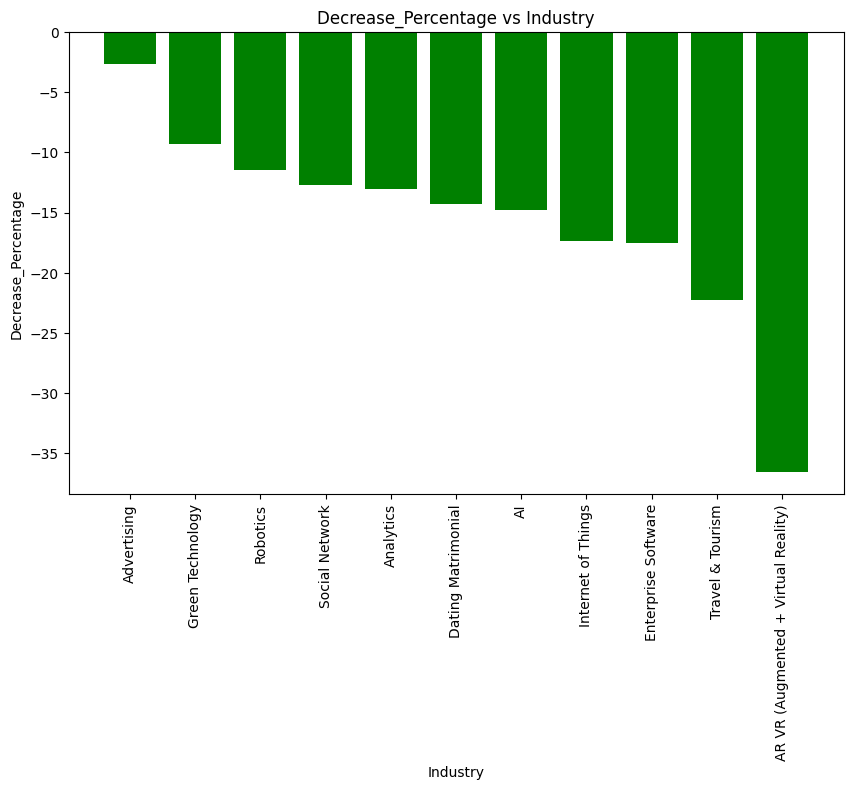

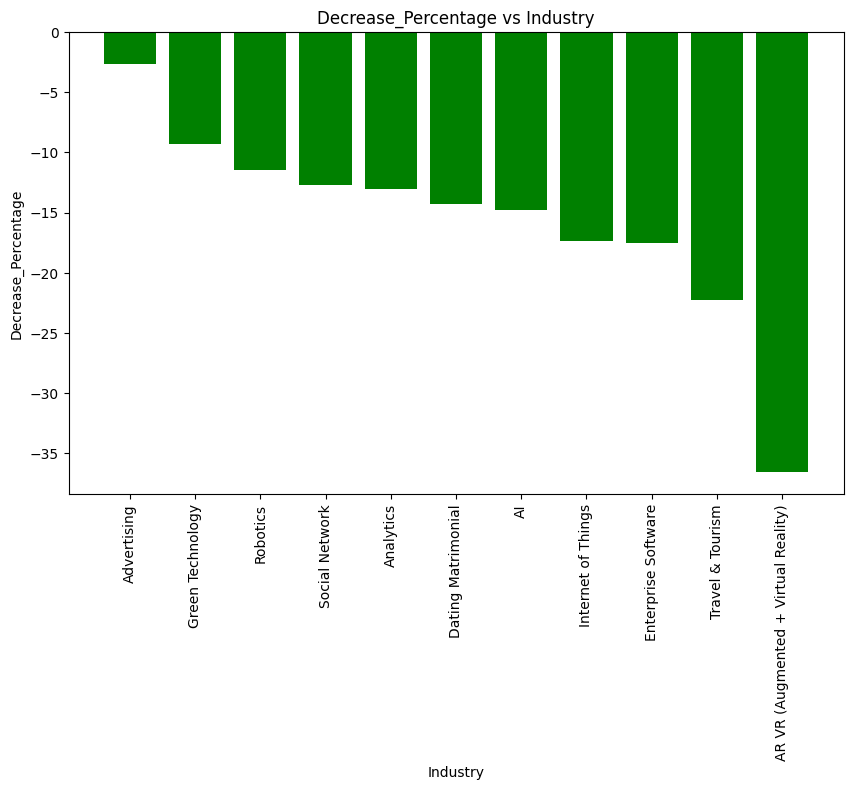

In [70]:
plot(decreased_df,'Industry','Decrease_Percentage')

In [47]:
# Filter the DataFrame to include only startups founded in 2019 and 2020
df = df[(df['Year'] >= 2019) & (df['Year'] <= 2020)]

# Group the data by industry and year, and count the number of companies
grouped = df.groupby(['Industry', 'Year']).size().unstack(fill_value=0)

# Calculate the difference between 2020 and 2019 counts
grouped['Decrease'] = grouped[2020] - grouped[2019]

# Filter for companies with a decrease in count
decreased_companies = grouped[grouped['Decrease'] < 0]

# Print or further process the 'decreased_companies' DataFrame
print(decreased_companies)

Year                                 2019  2020  Decrease
Industry                                                 
AI                                    345   294       -51
AR VR (Augmented + Virtual Reality)    93    59       -34
Advertising                           114   111        -3
Analytics                             115   100       -15
Dating Matrimonial                     14    12        -2
Enterprise Software                   326   269       -57
Green Technology                      397   360       -37
Internet of Things                    299   247       -52
Robotics                               96    85       -11
Social Network                        126   110       -16
Travel & Tourism                      270   210       -60


# Filter the DataFrame to include only startups founded in 2019 and 2020
df = df[(df['Year'] >= 2019) & (df['Year'] <= 2020)]

# Group the data by industry and year, and count the number of companies
grouped = df.groupby(['Industry', 'Year']).size().unstack(fill_value=0)

# Calculate the decrease in percentage from 2019 to 2020 for industries with non-zero values in 2019
grouped['Decrease_Percentage'] = abs(((grouped[2019] - grouped[2020]) / grouped[2019]) * 100)

# Filter for companies with a decrease in percentage and non-zero value in 2019
decreased_companies = grouped[(grouped['Decrease_Percentage'] > 0) & (grouped[2019] > 0)]

# Print or further process the 'decreased_companies' DataFrame
print(decreased_companies)

In [48]:
unique_count = df['Industry'].nunique()

# Print the count of unique values
print("Count of unique values in 'column_name':", unique_count)

Count of unique values in 'column_name': 56


In [49]:
column_sum = df['Count'].sum()

# Print the sum of values in the column
print("Sum of values in 'column_name':", column_sum)

Sum of values in 'column_name': 1724799
